# Nama : Vicko Bhayyu
# NIM : 09011181520036
# SK7Pil Artificial Intelligence

Sistem Penyiraman Otomatis dengan Logika Fuzzy


 Seorang petani ingin membuat suatu sistem penyiraman otomatis berbasiskan data suhu udara dan kelembaban tanah. Suhu udara ini diukur dari 15 sampai dengan 40 derajat, untuk kelembaban diukur dari 0 sampai dengan 950 RH. Sistem penyiraman otomatis ini akan mengeluarkan air otomatis bergantung pada lama waktu pompa air hidup atau lama waktu penyiraman dengan rentang waktu dari 2 detik hingga 20 detik.
    


In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

Input :
Suhu dibagi menjadi 4 bagian yakni :
- Dingin (15 - 23 derajat)
- Sejuk (19 - 27 derajat)
- Normal (23 - 31 derajat)
- Panas (29 - 40 derajat)

Kelembaban dibagi menjadi 3 bagian yakni:
- Kering (0 - 380 RH)
- Lembab (237 - 712 RH)
- Basah (570 - 950 RH)

Output : 
Lama waktu penyiraman yang dibagi menjadi 5 bagian yakni :
- Sangat cepat dengan rentang waktu  (2 - 4 detik)
- Cepat dengan rentang waktu (3 - 8 detik)
- Sedang denggan rentang waktu (7 - 12 detik)
- Lama dengan rentang waktu (11 - 15 detik)
- Sangat lama dengan rentang waktu (14 - 20 detik)

Suhu udara mempunyai rentang nilai dari 15 derajat - 40 derajat

In [2]:
suhu = ctrl.Antecedent(np.arange(15,40,1),'suhu')
suhu_x = np.arange(15,40,1) #untuk plotting saja

# Fuzzifikasi Suhu

Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk suhu udara, fungsi keanggotaan dibagi menjadi 4 bagian :
$$ Suhu Udara $$
$$ Dingin = 15^{\circ}C - 23^{\circ}C$$
$$ Sejuk = 19^{\circ} - 27^{\circ}C$$
$$ Normal = 23^{\circ} - 31^{\circ}C$$
$$ Panas = 23^{\circ} - 40^{\circ}C$$



Dengan fungsi keanggotaan suhu udara

\begin{equation}
  suhu['dingin'] = \mu SuhuDingin(x)=\begin{cases}
    1, & \text{$15\leq x\leq19$}.\\
    (23 - x)/(23 - 19) , & \text{$19 \leq x \leq 23$}.\\
    0, & \text{$x\geq 23$}.
  \end{cases}
  \\
  suhu['sejuk'] = \mu SuhuSejuk(x)=\begin{cases}
    0, & \text{$x\leq 19$ atau $x\geq27$}.\\
    (x - 19)/(23 - 19) , & \text{$19 \leq x \leq 23$}.\\
    (27 - x)/(27 - 23) , & \text{$23 \leq x \leq 27$}.\\
  \end{cases}
  \\
    suhu ['normal'] = \mu SuhuNormal(x)=\begin{cases}
    0, & \text{$x\leq 23$ atau $x\geq31$}.\\
    (x - 23)/(27 - 23) , & \text{$23 \leq x \leq 27$}.\\
    (31 - x)/(31 - 27) , & \text{$27 \leq x \leq 31$}.\\
  \end{cases}
  \\
    suhu['panas'] = \mu SuhuPanas(x)=\begin{cases}
    0, & \text{$x\leq 29$}.\\
    (x - 29)/(31 - 29) , & \text{$29 \leq x \leq 31$}.\\
    1, & \text{$x\geq 31$}.
  \end{cases}
\end{equation}



In [3]:
suhu['dingin'] = fuzz.trapmf(suhu.universe,[15,15,19,23]) #dari 15 derajat - 23 derajat
suhu['sejuk'] = fuzz.trimf(suhu.universe,[19,23,27]) #dari 19 derajat - 27 derajat
suhu['normal'] = fuzz.trimf(suhu.universe,[23,27,31])#dari 23 derajat - 31 derajat
suhu['panas'] = fuzz.trapmf(suhu.universe,[29,31,40,40]) #dari 27 derajat - 35 derajat

# PLOTTING MEMBERSHIP FUNCTION SUHU

Plotting fungsi keanggotaan $\mu SuhuDingin(x)$

Plot fungsi keanggotaan $\mu SuhuSejuk(x) $

Plot fungsi keanggotaan $\mu SuhuNormal(x) $

Plot fungsi keanggotaan $\mu SuhuPanas(x) $

Plotting ke empat fungsi keanggotaan suhu

C:\Users\AFIDIN\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


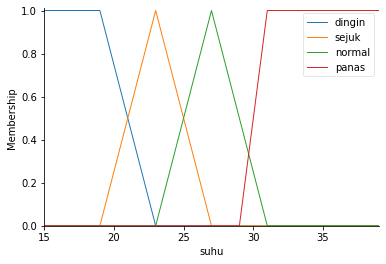

In [4]:
suhu.view()

# Fuzzifikasi Kelembaban

In [5]:
kelembaban = ctrl.Antecedent(np.arange(0,950,1),'kelembaban')
kelembaban_x = np.arange(0,950,1)

Untuk kelembaban tanah, fungsi keanggotaan dibagi menjadi 3 bagian :

Tanah tersebut dinyatakan kering ketika mempunyai nilai kelembaban 0 - 380 RH.

Tanah tersebut dinyatakan lembab ketika mempunyai nilai kelembaban 237 - 712 RH.

Tanah tersebut dinyatakan basah ketika mempunyai nilai kelembaban 570 - 950 RH


Dengan fungsi keanggotaan suhu udara

\begin{equation}
  kelembaban['kering'] = \mu KelembabanKering(x)=\begin{cases}
    1, & \text{$0\leq x \leq 200$}.\\
    \left.(380 - x) \,  \right/(380 - 200) , & \text{$200 \leq x \leq 380$}.\\
    0, & \text{$x\geq 380$}.
  \end{cases}
  \\
    kelembaban['lembab'] = \mu KelembabanLembab(x)=\begin{cases}
    0, & \text{$x\leq 237$ atau $x\geq712$}.\\
    \left.(x - 237)\, \right/(475 - 237) , & \text{$237 \leq x \leq 475$}.\\
    \left.(712 - x)\, \right/(712 - 475) , & \text{$475 \leq x \leq 712$}.\\
  \end{cases}
  \\
  kelembaban['basah'] = \mu KelembabanBasah(x)=\begin{cases}
    0, & \text{$x \leq 570$}.\\
    \left.(x - 570) \,  \right/(750 - 570) , & \text{$570 \leq x \leq 712$}.\\
    1, & \text{$x\geq 712$}.
  \end{cases}
\end{equation}



In [6]:
kelembaban['kering'] = fuzz.trapmf(kelembaban.universe,[0,0,200,380])
kelembaban['lembab'] = fuzz.trimf(kelembaban.universe,[237,475,712])
kelembaban['basah'] = fuzz.trapmf(kelembaban.universe,[570,750,950,950])


# Plotting membership function kelembaban

Plot fungsi keanggotaan $\mu KelembabanKering(x) $

Plot fungsi keanggotaan $\mu KelembabanLembab(x) $

Plot fungsi keanggotaan $\mu KelembabanBasah(x) $

Plot ke 3 fungsi keanggotaan kelembaban

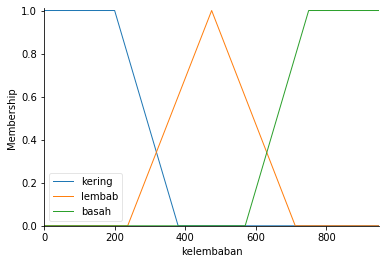

In [7]:
kelembaban.view()

# Fuzzifikasi Durasi

In [8]:
durasi = ctrl.Consequent(np.arange(2,20,1),'durasi')
durasi_x = np.arange(2,20,1)

Lama waktu penyiraman diberi nama variabel durasi dengan rentang waktu 2 - 20 detik dibagi menjadi 5 fungsi keanggotaan yakni :
1. Sangat Cepat = 2 - 4 Detik
2. Cepat = 3 - 8 Detik
3. Sedang = 7 - 12 detik
4. Lama = 11 - 15 detik
5. Sangat Lama = 14 - 20 detik


Dengan fungsi keanggotaan suhu udara

\begin{equation}
  durasi['sangat cepat'] = \mu DurasiSangatCepat(x)=\begin{cases}
    1, & \text{$2\leq x \leq 3$}.\\
    \left.(4 - x) \,  \right/(4 - 3) , & \text{$3 \leq x \leq 4$}.\\
    0, & \text{$x\geq 4$}.
  \end{cases}
  \\
    durasi['cepat'] = \mu DurasiCepat(x)=\begin{cases}
    0, & \text{$x\leq 3$ atau $x\geq8$}.\\
    \left.(x - 3)\, \right/(6 - 3) , & \text{$3 \leq x \leq 6$}.\\
    \left.(8 - x)\, \right/(8 - 6) , & \text{$6 \leq x \leq 8$}.\\
  \end{cases}
  \\
    durasi['sedang'] = \mu DurasiSedang(x)=\begin{cases}
    0, & \text{$x\leq 7$ atau $x\geq12$}.\\
    \left.(x - 7)\, \right/(10 - 7) , & \text{$7 \leq x \leq 10$}.\\
    \left.(12 - x)\, \right/(12 - 10) , & \text{$10 \leq x \leq 12$}.\\
  \end{cases}
  \\
   durasi['lama'] = \mu DurasiLama(x)=\begin{cases}
    0, & \text{$x\leq 11$ atau $x\geq15$}.\\
    \left.(x - 11)\, \right/(13 - 11) , & \text{$11 \leq x \leq 13$}.\\
    \left.(15 - x)\, \right/(15 - 13) , & \text{$13 \leq x \leq 15$}.\\
  \end{cases}
  \\
  durasi['sangat lama'] = \mu DurasiSangatLama(x)=\begin{cases}
    0, & \text{$x \leq 14$}.\\
    \left.(x - 14) \,  \right/(16 - 14) , & \text{$14 \leq x \leq 16$}.\\
    1, & \text{$x\geq 16$}.
  \end{cases}
\end{equation}



In [9]:
durasi['sangat cepat'] = fuzz.trapmf(durasi.universe,[2,2,3,4]) # dari 2 - 4 detik
durasi['cepat'] = fuzz.trimf(durasi.universe,[3,6,8]) # dari 3 - 8 detik
durasi['sedang'] = fuzz.trimf(durasi.universe,[7,10,12]) #dari 7 - 12 detik
durasi['lama'] = fuzz.trimf(durasi.universe,[11,13,15]) #dari 11 - 15 detik
durasi['sangat lama'] = fuzz.trapmf(durasi.universe,[14,16,20,20]) #dari 14 - 20 detik

# Plotting fungsi keanggotaan durasi

Plot fungsi keanggotaan $\mu DurasiSangatCepat(x) $

Plot fungsi keanggotaan $\mu DurasiCepat(x) $

Plot fungsi keanggotaan $\mu DurasiSedang(x) $

Plot fungsi keanggotaan $\mu DurasiLama(x) $

Plot fungsi keanggotaan $\mu DurasiSangatLama(x) $

Plotting kelima fungsi keanggotaan durasi

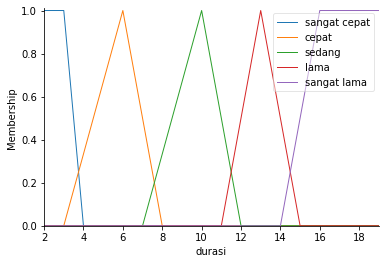

In [10]:
durasi.view()

# Inferencing
Pada tahap inferencing, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel suhu yang berjumlah 4 dan fuzzifikasi dari variabel kelembaban yang berjumlah 3, maka rule yang dibuat berjumlah 4 x 3 = 12 rule

1. IF Suhu DINGIN dan Kelembaban KERING THEN Durasi SEDANG
2. IF Suhu SEJUK dan Kelembaban KERING THEN Durasi SEDANG
3. IF Suhu NORMAL dan Kelembaban KERING THEN Durasi LAMA
4. IF Suhu PANAS dan Kelembaban KERING THEN Durasi SANGAT LAMA

5. IF Suhu DINGIN dan Kelembaban LEMBAB THEN Durasi CEPAT
6. IF Suhu SEJUK dan Kelembaban LEMBAB THEN Durasi CEPAT
7. IF Suhu NORMAL dan Kelembaban LEMBAB THEN Durasi SEDANG
8. IF Suhu PANAS dan Kelembaban LEMBAB THEN Durasi LAMA

9. IF Suhu DINGIN dan Kelembaban BASAH THEN Durasi SANGAT CEPAT
10. IF Suhu SEJUK dan Kelembaban BASAH THEN Durasi CEPAT
11. IF Suhu Normal dan Kelembaban BASAH THEN Durasi CEPAT
12. IF Suhu PANAS dan Kelembaban BASAH THEN Durasi CEPAT

In [11]:
rule1 = ctrl.Rule(suhu['dingin'] & kelembaban['kering'], durasi['sedang'])
rule2 = ctrl.Rule(suhu['sejuk'] & kelembaban['kering'], durasi['sedang'])
rule3 = ctrl.Rule(suhu['normal'] & kelembaban['kering'], durasi['lama'])
rule4 = ctrl.Rule(suhu['panas'] & kelembaban['kering'], durasi['sangat lama'])

rule5 = ctrl.Rule(suhu['dingin'] & kelembaban['lembab'], durasi['cepat'])
rule6 = ctrl.Rule(suhu['sejuk'] & kelembaban['lembab'], durasi['cepat'])
rule7 = ctrl.Rule(suhu['normal'] & kelembaban['lembab'], durasi['sedang'])
rule8 = ctrl.Rule(suhu['panas'] & kelembaban['lembab'], durasi['lama'])

rule9 = ctrl.Rule(suhu['dingin'] & kelembaban['basah'], durasi['sangat cepat'])
rule10 = ctrl.Rule(suhu['sejuk'] & kelembaban['basah'], durasi['cepat'])
rule11 = ctrl.Rule(suhu['normal'] & kelembaban['basah'], durasi['cepat'])
rule12 = ctrl.Rule(suhu['panas'] & kelembaban['basah'], durasi['cepat'])

# RULE EVALUATION

In [12]:
siram_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])

# DEFUZZIFIKASI

In [13]:
siramm = ctrl.ControlSystemSimulation(siram_ctrl)

Input suhu kita masukan 30 dan kelembaban 200

In [14]:
siramm.input['suhu'] = 30
siramm.input['kelembaban'] = 200

Melakukan perhitungan defuzzifikasi

In [15]:
siramm.compute()

Mencetak hasil output defuzzifikasi

In [16]:
print(siramm.output['durasi'])

15.743055555555557


Plotting fungsi keangggotaan suhu setelah dimasukkan input nilai pada suhu

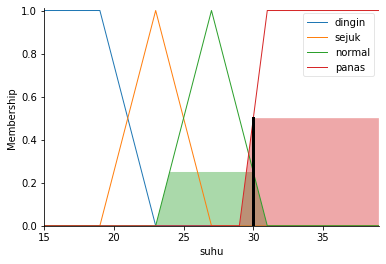

In [17]:
suhu.view(sim=siramm)

Plotting fungsi keangggotaan kelembaban setelah dimasukkan input nilai pada kelembaban

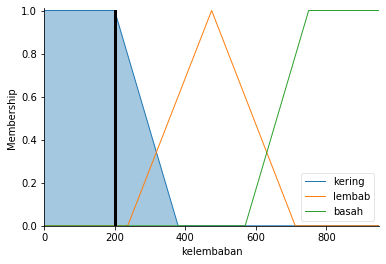

In [18]:
kelembaban.view(sim=siramm)

Plotting fungsi keangggotaan durasi setelah dilakukan perhitungan defuzzifikasi output nilai pada durasi

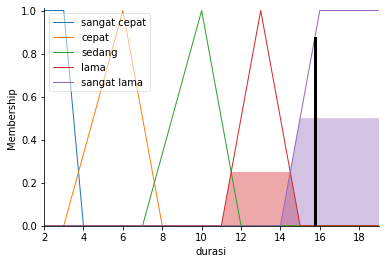

In [19]:
durasi.view(sim=siramm)

# Perhitungan Manual

\begin{equation}
    Suhu = 30 \\
    Masukkan\,nilai\,suhu\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,suhu\\
  suhu['dingin'] = \mu SuhuDingin(x)=\begin{cases}
    1, & \text{$15\leq x\leq19$}.\\
    (23 - x)/(23 - 19) , & \text{$19 \leq x \leq 23$}.\\
    0, & \text{$x\geq 23 $ }.\checkmark
  \end{cases}
  \\
  suhu['sejuk'] = \mu SuhuSejuk(x)=\begin{cases}
    0, & \text{$x\leq 19$ atau $x\geq27$}. \checkmark \\
    (x - 19)/(23 - 19) , & \text{$19 \leq x \leq 23$}.\\
    (27 - x)/(27 - 23) , & \text{$23 \leq x \leq 27$}.\\
  \end{cases}
  \\
    suhu ['normal'] = \mu SuhuNormal(x)=\begin{cases}
    0, & \text{$x\leq 23$ atau $x\geq31$}.\\
    (x - 23)/(27 - 23) , & \text{$23 \leq x \leq 27$}.\\
    (31 - 30)/(31 - 27) , & \text{$27 \leq x \leq 31$}.\checkmark \\
  \end{cases}
  \\
    suhu['panas'] = \mu SuhuPanas(x)=\begin{cases}
    0, & \text{$x\leq 29$}.\\
    (30 - 29)/(31 - 29) , & \text{$29 \leq x \leq 31$}.\checkmark\\
    1, & \text{$x\geq 31$}.
  \end{cases}
\end{equation}



\begin{equation}
    \mu SuhuNormal(30) = (31 - 30) / (31 - 27) \\
    \mu SuhuNormal(30) = 1/4 \\ 
    \mu SuhuNormal(30) = 0.25 \\
    \mu SuhuPanas(30) = (30 - 29) / (31-29) \\
    \mu SuhuPanas(30) = 1/2 \\
    \mu SuhuPanas(30) = 0.5 \\
\end{equation}

\begin{equation}
   Kelembaban = 200 \\
  kelembaban['kering'] = \mu KelembabanKering(x)=\begin{cases}
    1, & \text{$0\leq x \leq 200$}. \checkmark \\ 
    \left.(380 - x) \,  \right/(380 - 200) , & \text{$200 \leq x \leq 380$}.\\
    0, & \text{$x\geq 380$}.
  \end{cases}
  \\
    kelembaban['lembab'] = \mu KelembabanLembab(x)=\begin{cases}
    0, & \text{$x\leq 237$ atau $x\geq712$}.\checkmark\\
    \left.(x - 237)\, \right/(475 - 237) , & \text{$237 \leq x \leq 475$}.\\
    \left.(712 - x)\, \right/(712 - 475) , & \text{$475 \leq x \leq 712$}.\\
  \end{cases}
  \\
  kelembaban['basah'] = \mu KelembabanBasah(x)=\begin{cases}
    0, & \text{$x \leq 570$}.\checkmark\\
    \left.(x - 570) \,  \right/(750 - 570) , & \text{$570 \leq x \leq 712$}.\\
    1, & \text{$x\geq 712$}.
  \end{cases}
\end{equation}

\begin{equation}
 \mu KelembabanKering(x) = 1
\end{equation}

Lalu kita cari nilai z untuk setiap aturan dengan menggunakan fungsi MIN karena menggunakan rule AND

1 IF Suhu Dingin AND Kelembaban Kering THEN Durasi Sedang

$$ \\ \alpha(predikat_1) = \mu SuhuDingin \cap \mu KelembabanKering $$
$$\alpha(predikat_1)   = min (\mu SuhuDingin[30], \mu KelembabanKering[200]) $$
$$ \alpha(predikat_1) = min (0; 1) $$
$$ \alpha(predikat_1) = 0 $$

Lalu lihat himpunan Durasi Sedang 
$$
   durasi['sedang'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 7$ atau $x\geq12$}.\\
    \left.(x - 7)\, \right/(10 - 7) , & \text{$7 \leq x \leq 10$}.\\
    \left.(12 - x)\, \right/(12 - 10) , & \text{$10 \leq x \leq 12$}.\\
  \end{cases}
 $$
Maka nilai $ Z_1 = 0 $

=================================================================================================================

2 IF Suhu Sejuk AND Kelembaban Kering THEN Durasi Sedang

$$ \\ \alpha(predikat_2) = \mu SuhuSedang \cap \mu KelembabanKering $$
$$\alpha(predikat_2)   = min (\mu SuhuSedang[30], \mu KelembabanKering[200]) $$
$$ \alpha(predikat_2) = min (0; 1) $$
$$ \alpha(predikat_2) = 0 $$

Lalu lihat himpunan Durasi Sedang 
$$
   durasi['sedang'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 7$ atau $x\geq12$}.\\
    \left.(x - 7)\, \right/(10 - 7) , & \text{$7 \leq x \leq 10$}.\\
    \left.(12 - x)\, \right/(12 - 10) , & \text{$10 \leq x \leq 12$}.\\
  \end{cases}
$$

Maka nilai $ Z_2 = 0 $

=================================================================================================================

3 IF Suhu Normal AND Kelembaban Kering THEN Durasi Lama

$$ \\ \alpha(predikat_3) = \mu SuhuNormal \cap \mu KelembabanKering $$
$$\alpha(predikat_3)   = min (\mu SuhuNormal[30], \mu KelembabanKering[200]) $$
$$ \alpha(predikat_3) = min (0.25; 1) $$
$$ \alpha(predikat_3) = 0.25 $$

Lalu lihat himpunan Durasi Lama
$$
  \\
   durasi['lama'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 11$ atau $x\geq15$}.\\
    \left.(x - 11)\, \right/(13 - 11) , & \text{$11 \leq x \leq 13$}.\\
    \left.(15 - x)\, \right/(15 - 13) , & \text{$13 \leq x \leq 15$}.\\
  \end{cases}
  \\
$$
Terdapat 2 nilai keanggotaan maka kita uji satu persatu
 $$(x- 11) / (13 - 11) = 0.25 $$
 $$ x - 11 = 0.25 \times 2 $$
 $$ x - 11 = 0.5 $$
 $$ x = 11.5 $$
 
 $$ (15 -x) / (15 -13) = 0.25 $$
 $$ (15 - x) = 0.5 $$
 $$ - x = -14.5 $$
 $$ x = 14.5 $$
Akan diambil nilai terkecil
Maka nilai $ Z_3 = 11.5 $


=================================================================================================================

4 IF Suhu Panas dan Kelembaban Kering THEN Durasi Sangat Lama

$$ \\ \alpha(predikat_4) = \mu SuhuPanas \cap \mu KelembabanKering $$
$$\alpha(predikat_4)   = min (\mu SuhuPanas[30], \mu KelembabanKering[200]) $$
$$ \alpha(predikat_4) = min (0.5; 1) $$
$$ \alpha(predikat_4) = 0.5 $$

Lalu lihat himpunan sangat lama
$$ durasi['sangat\,lama'] = \mu(x)=\begin{cases}
    0, & \text{$x \leq 14$}.\\
    \left.(x - 14) \,  \right/(16 - 14) , & \text{$14 \leq x \leq 16$}.\\
    1, & \text{$x\geq 16$}.
  \end{cases}
$$

Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya

$$
(x-14) / (16-14) = 0.5 \\
(x-14) = 1 \\ 
x = 15 \\
$$

Maka nilai Z$_4$ = 15


=================================================================================================================
5 IF Suhu Dingin dan Kelembaban Lembab Durasi Cepat

$$ \\ \alpha(predikat_5) = \mu SuhuDingin \cap \mu KelembabanLembab $$
$$\alpha(predikat_5)   = min (\mu SuhuDingin[30], \mu KelembabanLembab[200]) $$
$$ \alpha(predikat_5) = min (0; 0) $$
$$ \alpha(predikat_5) = 0 $$

Lalu lihat himpunan Durasi Cepat
$$
    durasi['cepat'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 3$ atau $x\geq8$}.\\
    \left.(x - 3)\, \right/(6 - 3) , & \text{$3 \leq x \leq 6$}.\\
    \left.(8 - x)\, \right/(8 - 6) , & \text{$6 \leq x \leq 8$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_5$ = 0

=================================================================================================================

6 IF Suhu Sejuk dan Kelembaban Lembab THEN Durasi Cepat

$$ \\ \alpha(predikat_6) = \mu SuhuSejuk \cap \mu KelembabanLembab $$
$$\alpha(predikat_6)   = min (\mu SuhuSejuk[30], \mu KelembabanLembab[200]) $$
$$ \alpha(predikat_6) = min (0; 0) $$
$$ \alpha(predikat_6) = 0 $$

Lalu lihat himpunan Durasi Cepat
$$
    durasi['cepat'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 3$ atau $x\geq8$}.\\
    \left.(x - 3)\, \right/(6 - 3) , & \text{$3 \leq x \leq 6$}.\\
    \left.(8 - x)\, \right/(8 - 6) , & \text{$6 \leq x \leq 8$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_6$ = 0


=================================================================================================================

7 IF Suhu Normal dan Kelembaban Lembab THEN Sedang
$$ \\ \alpha(predikat_7) = \mu SuhuNormal \cap \mu KelembabanLembab $$
$$\alpha(predikat_7)   = min (\mu SuhuNormal[30], \mu KelembabanLembab[200]) $$
$$ \alpha(predikat_7) = min (0.25; 0) $$
$$ \alpha(predikat_7) = 0 $$

Lalu lihat himpunan Durasi Sedang

$$
   durasi['sedang'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 7$ atau $x\geq12$}.\\
    \left.(x - 7)\, \right/(10 - 7) , & \text{$7 \leq x \leq 10$}.\\
    \left.(12 - x)\, \right/(12 - 10) , & \text{$10 \leq x \leq 12$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_7$ = 0

=================================================================================================================

8 IF Suhu Panas dan Kelembaban Lembab THEN Sedang
$$ \\ \alpha(predikat_8) = \mu SuhuPanas \cap \mu KelembabanLembab $$
$$\alpha(predikat_8)   = min (\mu SuhuPanas[30], \mu KelembabanLembab[200]) $$
$$ \alpha(predikat_8) = min (0.5; 0) $$
$$ \alpha(predikat_8) = 0 $$

Lalu lihat himpunan Durasi Lama
$$
  \\
   durasi['lama'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 11$ atau $x\geq15$}.\\
    \left.(x - 11)\, \right/(13 - 11) , & \text{$11 \leq x \leq 13$}.\\
    \left.(15 - x)\, \right/(15 - 13) , & \text{$13 \leq x \leq 15$}.\\
  \end{cases}
  \\
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_8$ = 0

=================================================================================================================

9 IF Suhu Dingin dan Kelembaban Basah THEN Durasi Sangat Cepat
$$ \\ \alpha(predikat_9) = \mu SuhuDingin \cap \mu KelembabanBasah $$
$$\alpha(predikat_9)   = min (\mu SuhuDingin[30], \mu KelembabanBasah[200]) $$
$$ \alpha(predikat_9) = min (0; 0) $$
$$ \alpha(predikat_9) = 0 $$

Lalu lihat himpunan Durasi Sangat Cepat
$$ durasi['sangat cepat'] = \mu(x)=\begin{cases}
    1, & \text{$2\leq x \leq 3$}.\\
    \left.(4 - x) \,  \right/(4 - 3) , & \text{$3 \leq x \leq 4$}.\\
    0, & \text{$x\geq 4$}.
  \end{cases}
  \\
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_9$ = 0

=================================================================================================================

10 IF Suhu Sejuk dan Kelembaban Basah THEN Durasi Cepat
$$ \\ \alpha(predikat_1\,_0) = \mu SuhuSejuk \cap \mu KelembabanBasah $$
$$\alpha(predikat_1\,_0)   = min (\mu SuhuSejuk[30], \mu KelembabanBasah[200]) $$
$$ \alpha(predikat_1\,_0) = min (0; 0) $$
$$ \alpha(predikat_1\,_0) = 0 $$

Lalu lihat himpunan Durasi Cepat
$$
    durasi['cepat'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 3$ atau $x\geq8$}.\\
    \left.(x - 3)\, \right/(6 - 3) , & \text{$3 \leq x \leq 6$}.\\
    \left.(8 - x)\, \right/(8 - 6) , & \text{$6 \leq x \leq 8$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_1$$_0$ = 0

=================================================================================================================

11 IF Suhu Normal dan Kelembaban Basah THEN Durasi Cepat
$$ \\ \alpha(predikat_1\,_1) = \mu SuhuNormal \cap \mu KelembabanBasah $$
$$\alpha(predikat_1\,_1)   = min (\mu SuhuNormal[30], \mu KelembabanBasah[200]) $$
$$ \alpha(predikat_1\,_1) = min (0.25; 0) $$
$$ \alpha(predikat_1\,_1) = 0 $$

Lalu lihat himpunan Durasi Cepat
$$
    durasi['cepat'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 3$ atau $x\geq8$}.\\
    \left.(x - 3)\, \right/(6 - 3) , & \text{$3 \leq x \leq 6$}.\\
    \left.(8 - x)\, \right/(8 - 6) , & \text{$6 \leq x \leq 8$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_1$$_1$ = 0

=================================================================================================================

12 IF Suhu Panas dan Kelembaban Basah THEN Durasi Cepat
$$ \\ \alpha(predikat_1\,_2) = \mu SuhuPanas \cap \mu KelembabanBasah $$
$$\alpha(predikat_1\,_2)   = min (\mu SuhuPanas[30], \mu KelembabanBasah[200]) $$
$$ \alpha(predikat_1\,_2) = min (0.5; 0) $$
$$ \alpha(predikat_1\,_2) = 0 $$

Lalu lihat himpunan Durasi Cepat
$$
    durasi['cepat'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 3$ atau $x\geq8$}.\\
    \left.(x - 3)\, \right/(6 - 3) , & \text{$3 \leq x \leq 6$}.\\
    \left.(8 - x)\, \right/(8 - 6) , & \text{$6 \leq x \leq 8$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_1$$_2$ = 0



Dari sini kita dapat mencari nilai z, yaitu :

Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 +
\alpha predikat_1\,_0 \times Z_1\,_1 +
\alpha predikat_1\,_1 \times Z_1\,_2 +
\alpha predikat_1\,_2 \times Z_1\,_2 +}
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9 + \alpha predikat_1\,_0 +
\alpha predikat_1\,_1 + \alpha predikat_1\,_2}$$

 $$Z = \frac{0 + 0 + 0.25 \times 11.5 + 0.5 \times 15 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0}{0 + 0 + 0.25 + 0.5 + 0 + 0 + 0 + 0 + 0 +0 +0 +0} $$
 
 $$ Z = \frac{2.875 + 7.5}{0.75} $$
 $$ Z = 13.83333 \, detik $$

Hasil output yang dikeluarkan menggunakan code python sebesar 15,74 detik sedangkan perhitungan manual sebesar 13,833 detik.
Terdapat perbedaan sebesar 1.907 detik